Author: Abdulrahman Altahhan, 2025.

The notebook uses a library of functionality in RL that aims for simplicity and general insight into how algorithms work, these libraries are written from scratch using standard Python libraries (numpy, matplotlib etc.).
Please note that you will need permission from the author to use the code for research, commercially or otherwise.

# Worksheet 3: Grid World Environment Class

In this lesson we cover various grid world environments that are tackled as examples in the accompanying text book available online [here](http://incompleteideas.net/book/RLbook2020.pdf). Please note that we explain the ideas of this topic from a practical perspective and not from a theoretical perspective which is already covered in the textbook.

**Learning outcomes**
1. become familiar with the different types of grid world problems that we will tackle in our units
2. become familiar with the way we assign a reward to an environment
3. be able to execute actions in a grid world and observe the result
4. be able to to visualise a policy and its action-value function

**Reading**:
The accompanying reading of this lesson is **chapter 3** from our text book by Sutton and Barto available online [here](http://incompleteideas.net/book/RLbook2020.pdf). 

In a grid world, we have a set of cells that the agent can move between them inside a box. The agent can move left, right, up and down. We can also allow the agent to move diagonally, but this is uncommon. 

Below we develop our Grid class. We needed to be as efficient as possible, and hence we have chosen to represent each state by its count, where we count from the bottom left corner up to the right top corner, and we start with 0 up to nS-1 where nS is the number of states. This will allow us to streamline the process of accessing and storing a state and will be of at most efficiency. We also deal with actions similarly, i.e. each action of the nA actions is given an index 0..nA-1. For the usual grid, this means 0,1,2,3 for actions left, right, up and down. We represent a 2-d grid by a 1-d array, and so care must be taken on how the agent moves between cells. 

Moving left or right seems easy because we can add or subtract from the *current* state. But when the agent is on the edge of the box, we cannot allow for an action that takes it out of the box. So if the agent is on the far right, we cannot allow it to go further to the right. To account for this issue, we have written a valid() function to validate an action. Moving up and down is similar, but we need to add and subtract a full row, which is how many columns we have in our grid. the valid() function checks for the current state and what would be the next state, and it knows that an agent will overstep the boundary as follows: if s%cols!=0, this means that the agent was not on the left edge and executing a right action (s+a)%cols==0 will take it to the left edge. This means it was on the right edge and wanted to move off this right edge. Other checks are similar. We have also accounted for moving diagonally so the agent will not overstep the boundaries.

We have also accounted for different reward schemes that we might want to use later in other lessons. These are formulated as an array of 4 elements [intermediate, goal1, goal2, cliff] the first reward represents the reward the agent obtains if it is on any intermediate cell. Intermediate cells are non-terminal cells. Goals or terminal states are those that a task would be completed if the agent steps into them. By setting the goals array, we can decide which cells are terminal/goals. As we can see, there are two goals, this will allow us to deal with all the classical problems we will tackle in our RL treatments, but we could have set up more. So, our reward array's second and third elements are for the goals. The last entry is for a cliff. A cliff cell is a special type of non-terminal cell where the agent will emulate falling off a cliff and usually is given a high negative reward and then will be hijacked and put in its start position when it steps into these types of cells. These types of cells are non-terminal in the sense that the agent did not achieve the task when it went to them, but they provoke a reset of the agent position with a large negative reward.

The most important function in our class is the step(a) function. An agent will take a specific action in the environment via this function. Via this function, we return the reward from our environment and a flag (done) indicating whether the task is accomplished. This makes our environment compatible with the classic setup of an OpenAI Gym Atari games, which we deal with towards the end of our RL treatment.

To help you, Abdulrahman recorded a set of videos that covers the chapter.

## Video Lectures for MDP
- [video: MDP](https://leeds365-my.sharepoint.com/:v:/g/personal/scsaalt_leeds_ac_uk/ER48PfkfJr1Ck82S9n4SDZkB1dJj3aoTZW88LCy4STKO1A?e=yEpLss)
- [video: Dynamics](https://leeds365-my.sharepoint.com/:v:/g/personal/scsaalt_leeds_ac_uk/Eeqp03kBVDxPvPJZByVe-NoB7sySvymdHP64k66J8AtZ_g?e=sJgBqe)
- [video: Returns 1](https://leeds365-my.sharepoint.com/:v:/g/personal/scsaalt_leeds_ac_uk/EeqsqeVY8lJJjgVG9f-wxXYBu1JlPFdxPDh_MLfHWouraQ?e=3MAYjH)
- [video: Returns 2](https://leeds365-my.sharepoint.com/:v:/g/personal/scsaalt_leeds_ac_uk/EWOLGoq-WM5FhrHu20vBM8QBju2eJo3p90fZbCvOctF9pA?e=2bV3nA)
- [video: Expectation and Sampling](https://leeds365-my.sharepoint.com/:v:/g/personal/scsaalt_leeds_ac_uk/Ee14gXvRaDVDirc9gfIU82IBBByAHuj0Lhrgjep4iBHUQA?e=PQe4Mb)
- [video: Bellman Equation for v](https://leeds365-my.sharepoint.com/:v:/g/personal/scsaalt_leeds_ac_uk/EVWUbW10cXpEi8vs6qUaSvUBohBWnbsF5x3fjgvUjf1rZw?e=FkcyA6)
- [video: Bellman Equation for q](https://leeds365-my.sharepoint.com/:v:/g/personal/scsaalt_leeds_ac_uk/EbDLGDpgacFCvPSOCJPAnIkBfWUWU_UuycDXdPSldaX21w?e=9sUgHc)
- [video: Bellman Optimality Equation 1](https://leeds365-my.sharepoint.com/:v:/g/personal/scsaalt_leeds_ac_uk/EZmrPrfyep5LiQkZSSYV0nMB4JqOQplHU6Cbxqkn0ly7dQ?e=518aGx)
- [video: Bellman Optimality Equation 2](https://leeds365-my.sharepoint.com/:v:/g/personal/scsaalt_leeds_ac_uk/ETuJiY2ZboBDox6T4pdM0EoBDDLlFzkjsS2dS2iMYuXAhw?e=byppJl)

You can adjust the video settings in SharePoint (speed up to 1.2 and reduce the noise if necessary)

*Exercise 1*: If you realise there is a missing symbol in the [video: Bellman Equation for v] last equations, do you know what it is and where it has originally come from?

*Exercise 2*: can you derive Bellman Optimality Equation for $q(s,a)$ from first principles?

[video:  Bellman Optimality for q from first principles](https://leeds365-my.sharepoint.com/:v:/g/personal/scsaalt_leeds_ac_uk/EVBv-P5S4_VKqFt_E0vikIUBdpV1BZX2V-IDM3ROXDDV4A?e=YQQchV)

## $G_t$ Monotonicity for Non-Sparse MDP Rewards
Let us see how the return develops for an MDP with a reward of 1 or -1 for each time step.
To calculate $G_t$ we will go backwards, i.e. we will need to calculate $G_{t+1}$ to be able to calculate $G_t$ due to the incremental form of $G_t$ where we have that $G_t = R_{t+1} + \gamma G_{t+1}$.

- Mathematically, we can prove that $G_t$ is monotonically decreasing iff(if and only if) $\frac{R_{t}}{1 - \gamma} >  G_{t}$ $\forall t$ and $G_T=R_T > 0$. 
    - Furthermore, when $R_t=1$ $\forall t$ and $\gamma=.9$ then $G_t$ converges in the limit to 10, i.e. 10 will be an upper bound for $G_t$. 
    - Similarly, when $R_t=1$ $\forall t$ and $\gamma=.09$ then $G_t$ converges in the limit to 100
    - More generally, when $1-\gamma = 1/\beta$ then $ R_t \beta > G_t$ 
- On the other hand, we can prove that $G_t$ is monotonically increasing iff $\frac{R_{t}}{1 - \gamma} <  G_{t}$.
    - Furthermore, when $R_t=-1$ $\forall t$ and $\gamma=.9$ then $G_t$ converges to -10, i.e. -10 is its lower bound. 
    - More generally, when $1-\gamma = 1/\beta$ then $ R_t \beta < G_t$ 

Below we prove the former and leave the latter for you as homework.

$G_t = R_{t+1} + \gamma G_{t+1}$

We start by assuming that $G_t$ is strictly monotonically decreasing (we dropped the word strictly in th above for readability)

$G_t > G_{t+1} > 0$ $\forall t$ (which entails that $G_T=R_T > 0$ when the horizon is finite, i.e. ends at $t=T$) we substitute by the incremental form of $G_t$

$G_t > G_{t+1} > 0$ $\forall t \implies R_{t+1} + \gamma G_{t+1} >G_{t+1} \implies$  
$R_{t+1} >  G_{t+1} - \gamma G_{t+1} \implies$
$R_{t+1} >  (1 - \gamma) G_{t+1} \implies$

$\frac{R_{t+1}}{1 - \gamma} > G_{t+1}$ ( $\gamma \ne 1$)

The inequality $\frac{R_{t+1}}{1 - \gamma} >  G_{t+1}$ (which also can be written as $\frac{R_{t}}{1 - \gamma} >  G_{t}$) must be satisfied whenever $G_t$ is monotonically decreasing, i.e. it is a necessary condition. We can show that this inequality is also a sufficient condition to prove that $G_t$ is monotonically decreasing by following the same logic backwards. Similar things can be proven for the non-strictly monotonically decreasing case i.e. when $G_t\ge G_{t+1} \ge 0$ $\forall t$.

Now when $R_{t+1}=1$ and $\gamma=.9$, then by substituting these values in the inequality, we get that
$\frac{1}{1 - .9} >  G_{t+1} \implies$ $10 > G_{t+1}$ 

The code below confirms this.

In [1]:
import sys, random, math

In [2]:
G = 0
R = 1
γ = 0.9
T = 100
for t in range(T,0,-1):
    if t> 70: print('G_',t,'=',round(G,3))
    G = R + γ*G
    

G_ 100 = 0
G_ 99 = 1.0
G_ 98 = 1.9
G_ 97 = 2.71
G_ 96 = 3.439
G_ 95 = 4.095
G_ 94 = 4.686
G_ 93 = 5.217
G_ 92 = 5.695
G_ 91 = 6.126
G_ 90 = 6.513
G_ 89 = 6.862
G_ 88 = 7.176
G_ 87 = 7.458
G_ 86 = 7.712
G_ 85 = 7.941
G_ 84 = 8.147
G_ 83 = 8.332
G_ 82 = 8.499
G_ 81 = 8.649
G_ 80 = 8.784
G_ 79 = 8.906
G_ 78 = 9.015
G_ 77 = 9.114
G_ 76 = 9.202
G_ 75 = 9.282
G_ 74 = 9.354
G_ 73 = 9.419
G_ 72 = 9.477
G_ 71 = 9.529


## $G_t$ Monotonicity for Sparse MDP Rewards

For sparse positive end-of-episode rewards, the above strict inequality is not satisfied since $R_t=0$ $\forall t<T$ and $R_T>0$.
1. In this case, we can show that $G_t \le G_{t+1}$ i.e. $G_t$ it is a monotonically increasing function.
    1. Furthermore, when $\gamma<1$ then $G_t$ is strictly increasing, i.e.  $G_t < G_{t+1}$
1. Furthermore, $G_{t} = \gamma^{T-t-1} R_{T}$.
    1. when $R_T=1$ then $G_{t} = \gamma^{T-t-1}$ 
    1. when $R_T=-1$ then $G_{t} = -\gamma^{T-t-1}$

- To prove the monotonicity we start with our incremental form for the return: 
    $G_t = R_{t+1} + \gamma G_{t+1}$:
    
    Since we have that $R_{t+1} = 0$ $\forall t<T$ then
    
    $G_t = \gamma G_{t+1}$ $\forall t<T$, therefore, since $\gamma \le 1$ then $G_t \le G_{t+1}$ $\forall t<T$.

- To prove that  $G_{t} = \gamma^{T-t-1} R_{T}$ we can also utilise the incremental form and perform a deduction, but it is easier to start with the general form of a return, we have:
    
    $G_t = R_{t+1} + \gamma R_{t+2}  + \gamma^2 R_{t+3} + \gamma^3 R_{t+4} + ... + \gamma^{T-t-1} R_{T}$
    
    Since we have that $R_{t+1} = 0$ $\forall t<T$ then
    
    $G_t = \gamma^{T-t-1} R_{T}$

This gives us guidance on the type of behaviour that we expect our agent to develop when we follow one of these reward regimes (sparse or non-sparse). 

The above suggests that for sparse end-of-episode rewards, decisions near the terminal state(s) have far more important effects on the learning process than earlier decisions. While for non-sparse positive rewards MDPs, earlier states have higher returns and hence more importance than near terminal states. 

If we want our agent to place more importance on earlier states, and near-starting state decisions, then we will need to utilise non-sparse (positive or negative) rewards. Positive rewards encourage repeating certain actions that maintain the stream of positive rewards for the agent. An example will be the pole balancing problem. Negative rewards, encourage the agent to speed up towards ending the episode so that it can minimise the number of negative rewards received.

When we want our agent to place more importance for the decisions near the terminal states, then a sparse reward is more convenient. Sparse rewards are also more suitable for offline learning as they simplify the learning and analysis of the agent's behaviour. Non-sparse rewards suit online learning on the other hand, because they give a quick indication of the agent behaviour suitability and hence speed up the early population of the value function. 


In [3]:
G = 0
γ = 0.9 # change to 1 to see the effect
T = 100
for t in range(T,1,-1): # note that if we use a forward loop, our calculations will be all wrong although the code runs
    if t>70: print('G_',t,'=',round(G,2), round(γ**(T-t-1),2) if t<T else 0)
    R=1 if t==T else 0
    G = R + γ*G
    

G_ 100 = 0 0
G_ 99 = 1.0 1.0
G_ 98 = 0.9 0.9
G_ 97 = 0.81 0.81
G_ 96 = 0.73 0.73
G_ 95 = 0.66 0.66
G_ 94 = 0.59 0.59
G_ 93 = 0.53 0.53
G_ 92 = 0.48 0.48
G_ 91 = 0.43 0.43
G_ 90 = 0.39 0.39
G_ 89 = 0.35 0.35
G_ 88 = 0.31 0.31
G_ 87 = 0.28 0.28
G_ 86 = 0.25 0.25
G_ 85 = 0.23 0.23
G_ 84 = 0.21 0.21
G_ 83 = 0.19 0.19
G_ 82 = 0.17 0.17
G_ 81 = 0.15 0.15
G_ 80 = 0.14 0.14
G_ 79 = 0.12 0.12
G_ 78 = 0.11 0.11
G_ 77 = 0.1 0.1
G_ 76 = 0.09 0.09
G_ 75 = 0.08 0.08
G_ 74 = 0.07 0.07
G_ 73 = 0.06 0.06
G_ 72 = 0.06 0.06
G_ 71 = 0.05 0.05


Ok, so now we are ready to tackle the practicals, let us get started!

In [4]:
%matplotlib inline

You might need to install opencv on your python environment to do 

pip install opencv-python

In [5]:
from env.grid import *

In a sense, Grid is class we can readily use to tackle the different problems ahead of us.  Let us test this class to appreciate what it is doing. we will start by the basics of the class and work our way through its different funcitonality. We will start by simple state representation that gives each state an index(count). The actions are extremely efficient and boil down to adding or subtracting a number of cell positions depending on the action. 

The set of possible rewards is 4; one for 2 possible goals (terminal states), one for intermediate (non-terminal) states and one special for cliff falling. The class caller can assign one of the special rewards by passing its name, and the setattr() function will handle the rest.

Let us have a look at how to use the basic capabilities of this class.

In [6]:
gw = Grid()
print(gw.s)
gw.step(1) # move right
print(gw.s)

27
28


In [7]:
gw = Grid()
def go_far_right():
    gw.s = 0
    for s in range(gw.cols+1):
        gw.step(1)

    print(gw.trace)
    
go_far_right()

[27, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8]


Once the agent hits the right wall it stays there. To see that we adjust the function to overshoot the number of possible cells (cols in this case).

In [8]:
def go_far_right():
    gw.s = 0
    for s in range(gw.cols+1):
        gw.step(1)

    print(gw.trace)
    
go_far_right()

[27, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8]


As we can see once the agent hits the right wall in state 8 it stays there. Note that the new trace is added to the original trace. If you want to create a new trace we can reset the Grid variable gw or we can reset the gw.trace variable.

In [9]:
gw = Grid()
go_far_right()

[27, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8]


## Different Grid Styles
Below we show how to use the Grid class to creat different grid styles. 


In [10]:
wind = [0]*10
wind

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

There are a few points to realise in the Grid class. 
First, it gives us the flexibility to pick from a set of ready-made reward schemes we can choose from via passing their names, ex. Grid(reward='cliffwalk').
Via the reward we set the following componenets [intermediate, goal0,goal1, cliff]. The intermediate reward componenet represents the rewards that the agent will recieve for non-terminal and non-special states, goal0 and goal1 are for ending up in one of the two possible goals/terminals states, the cliff reward is for ending up in a cliff state (falling off the cliff).

Possible readymade reward funcitons with thier values are:[intermediate, goal0,goal1, cliff]
                
    'reward_'    ==> ([0,    1,   0, -100]) default
    'cliffwalk'  ==> ([-1,  -1,  -1, -100])
    'randwalk'   ==> ([ 0,   0,   1,    0])
    'randwalk_'  ==> ([ 0,  -1,   1,    0])
    'reward0'    ==> ([-1,   0,   0,   -1])
    'reward_1'   ==> ([-1,  -1,  -1,   -1])
    'reward1'    ==> ([-1,   1,   1,   -1])
    'reward10'   ==> ([-1,  10,  10,   -1])
    'reward100'  ==> ([-1, 100, 100,   -1])
     
We can also directly set the self.reward attribute.

In addition, the class accounts for different 'style's of environments, such as the 'maze', the 'cliff' and the 'windy' environments. Each one of these styles will have a specific layout in terms of the number of cells and where the goals are. We will demo each to appreciate how they look and how the agent will behave inside them.
Note that the way we structured the obstacles in the maze allows us to change the maze size while keeping the overall structure. This will be useful when we tackle planning algorithms.

## Visualising the Grid

Ok, dealing with the bare minimum grid without visualisation makes it difficult to observe the behaviour of an agent. Now we show useful set of visualisation routines to make this possible. 

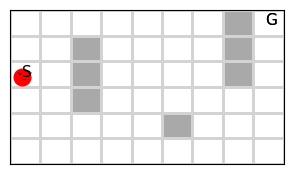

In [11]:
gw = Grid(style='maze')
gw.render()

To see the internal state representation that we use in our grid world we can render it  as follows

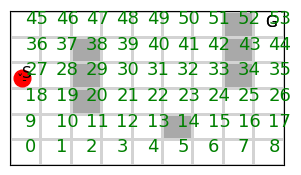

In [12]:
gw.render(underhood='states')

## Animating the Grid
Grid animation is very easy thanks to the render function which take care of setting the scene and clearing the output. Below we show a simple function that achieve this.

In [13]:
def animate_right(gw=Grid(), pause=0):
    gw.s=gw.s0 # reset the agent position
    # let us go right
    for s in range(5):
        gw.step(1)
        gw.render(pause=pause)

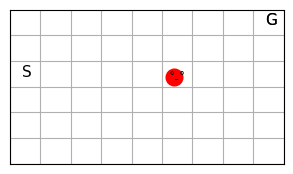

In [14]:
animate_right()

In [15]:
def scan(env, animate=True, pause=0):
    env.s = 0 # env.s0 # reset the agent position

    # scan the whole env
    for s in range(env.s, env.nS):#env.s0,env.s0+1):
        if s in env.obstacles: continue
        for a in range(gw.nA):
            env.s = s
            env.render(animate=animate, pause=pause)
            env.step(a)
            env.render(animate=animate, pause=pause)
        env.s = s
        #plt.pause(.5)

In [16]:
# %time scan(gw)

In [17]:
def wander(gw, animate=True, pause=0):
    gw.s=gw.s0 # reset the agent position
    
    # let us go right
    for s in range(gw.cols):
        gw.step(1)
        gw.render(animate=animate, pause=pause)
    
    # let us go left
    for s in range(gw.rows):
        gw.step(0)
        gw.render(animate=animate, pause=pause)

    # scan the whole env
    for s in range(gw.s,gw.nS):#gw.s0,gw.s0+1):
        if s in gw.obstacles: continue
        for a in range(gw.nA):
            gw.s = s
            gw.render(animate=animate, pause=pause)
            gw.step(a)
            gw.render(animate=animate, pause=pause)
        gw.s = s
        #plt.pause(.5)

In [18]:
# %time wander(Grid())

## Visualising the a Policy on a Grid

Next we further show how to use various rendering routines to enhance and enrich the Grid class. Mainly these rendering routines will be used to show either the V functions of the current policy, or arrows that represent the most prominant Q value or the deterministic or stochastic action of a policy π. We will simply call these rendering functions to visualise results.

In [19]:
gw = Grid(style='maze')

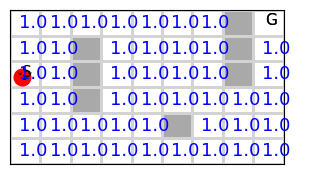

In [20]:
gw.render(underhood='V',    pause=1)

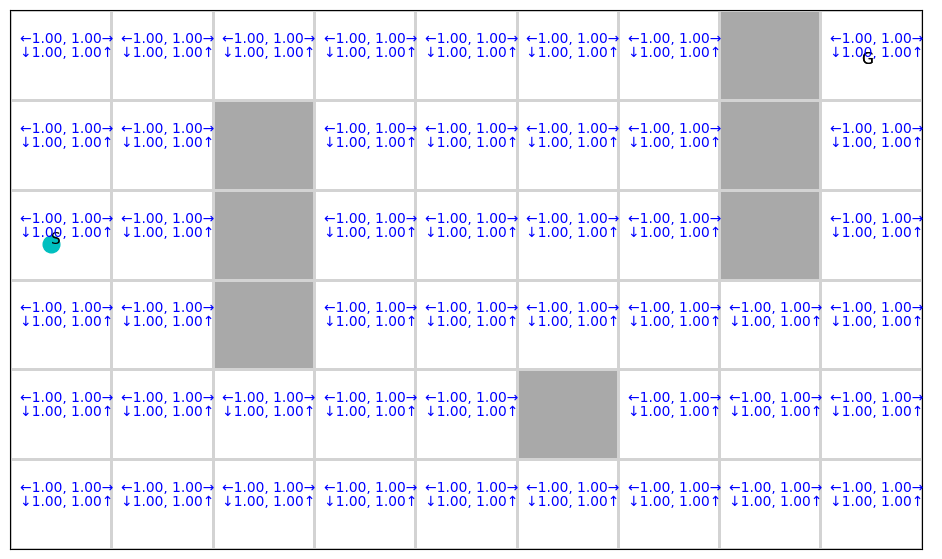

In [21]:
gw = Grid(style='maze',figsize=(40, 7))
gw.render(underhood='Q')

Note that the above is due to  plt.text('←') function which is a slow function for the display.

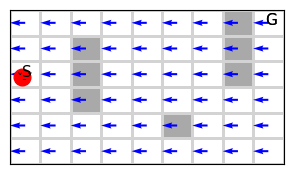

In [22]:
gw = Grid(style='maze')
gw.render(underhood='maxQ', pause=1)

Note that the above arrows are due to the plt.quiver() function and **not** the slower plt.text('←') function. 

## Visualisation for a specialist Grids
Let us see now to visualise certyain kind of common grid world.

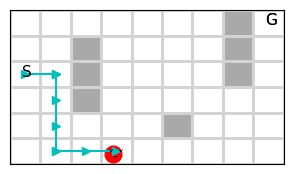

In [23]:
gw = Grid(style='maze')
for _ in range(2):gw.step(1)
for _ in range(4):gw.step(2)
for _ in range(2):gw.step(1)
    
gw.render(underhood='trace')

In [24]:
6*9-1

53

In [25]:
5//(2*10)

0

## Jumping Grid Class!
We can also allow the agent to jump randomly or to a specific location in the grid without going through intermediate states. This will be used later in other lessons that deal with state representations. Here we define a jumping Grid by assigning its jump attribute to a value>1(default).

In [26]:
mz = Grid(style='maze')

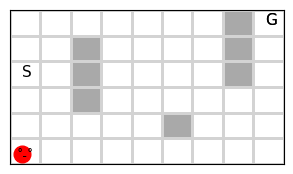

In [27]:
mz.render()
plt.pause(1)
mz.jump = 3
mz.step(2)
mz.render()

Note how the agent jumped from start state to the bottom state directly, repeat the execution to see the effect of random jumps. You can switch this randomness off to see also the effect.

## Useful functions to return special types of Grids
Often we will be dealing with special types of Grid class such as grid with obstacles that constitute something like a *maze* or an agent walking on *cliff* which can occasionally fall off etc. Therefore, we define below a set of useful functions that returns these types of Grids. Also we have adopt the convention of adding a prefix to the word Grid to all classes that are derived from the Grid class. Finally, to avoid redefining the above functions we have used the Grid=Grid to pass the kind of Grid class that we meant to generate an instance of.

In [28]:
#-------------------------------suitable for control------------------------------------------------
def grid(Grid=Grid, **kw):
    return Grid(gridsize=[8, 10], s0=31, goals=[36], **kw)

def grid8(Grid=Grid, **kw): 
    return grid(Grid=Grid, nA=8, **kw)

def windy(Grid=Grid,  **kw):
    return Grid(gridsize=[7, 10], s0=30, goals=[37], style='windy', **kw)

def cliffwalk(Grid=Grid, **kw):
    return Grid(gridsize=[4, 12], s0=0,  goals=[11], style='cliff', reward='cliffwalk', figsize=[12,2], **kw)

def maze(Grid=Grid, r=6, c=9, **kw):
    return Grid(gridsize=[r,c], s0=r//2*c, goals=[r*c-1], style='maze', **kw)

def maze_large(Grid=Grid, **kw):
    return maze(Grid=Grid, r=16, c=26, figsize=[25,4],**kw)

def maze8(Grid=Grid, **kw): 
    return maze(Grid=Grid, nA=8, **kw)

#-------------------------------suitable for prediction------------------------------------------------
def randwalk(Grid=Grid, nS=5+2, Vstar=None, **kw):
    if Vstar is None: Vstar = np.arange(0,nS)/(nS-1)
    return Grid(gridsize=(1,nS), reward='randwalk', nA=2, goals=[0,nS-1], s0=nS//2, Vstar=Vstar, **kw)


def randwalk_(Grid=Grid, nS=19+2, Vstar=None, **kw):
    if Vstar is None: Vstar = np.arange(-(nS-1),nS,2)/(nS-1)
    return Grid(gridsize=(1,nS), reward='randwalk_', nA=2, goals=[0,nS-1], s0=nS//2, Vstar=Vstar,**kw)

Let us now try these functions that return different grid environments with visualisation.

## Simple grid world environment
In this environment the agent is placed in front of a goal and it just needs to go straight to find it. However to make it more difficult we ordered the actions from left to right and down to top so the agent usually picks left before right and down before top.

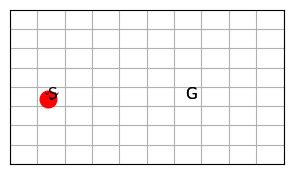

In [29]:
gw = grid()
gw.render() 

In [30]:
gw.rewards

[0, 1, 0, -100]

## Windy Environment
In a windy environment we apply a wind upwards which will push the agent 1 or 2 cells above what would be its next cell when moving in the grid. The result is that the agent will find itself pushed toward the top borders of the grid. Below we show an example.

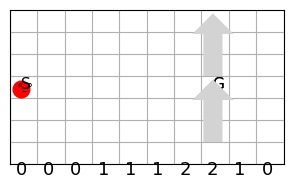

In [31]:
gw = windy()
gw.render()
gw.s0=0
# wander(gw, pause=0)

In [32]:
gw.rewards

[0, 1, 0, -100]

## Maze environment
In a maze environment the agent is supposed to go form a start position to a goal position. On the way there are some obstacles that block the agent path and the goal is almost hidden in the top corner so that it is not readily accessible by the agent.

In [33]:
# wander(gw=Grid(style='maze'), pause=0)

## Random walk environment
In a random walk environment we simply allow the agent to flip a coin and accordingly either go left or right. The environment has two goals one to the right which yields a positive reward of 1 and one to the left which yields no reward or a negative reward, all intermediate states have rewards of 0. Below we show a visualisation of this environment.

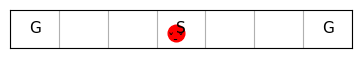

In [34]:
rw = randwalk()
rw.render()

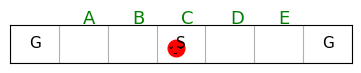

In [35]:
rw.render(underhood='letters')

The rewards array is different that the *set* of possible rewards that we will use later. Observe the difference in the below.

In [36]:
rw.rewards

[0, 0, 1, 0]

In [37]:
rw.rewards_set()

array([0, 1])

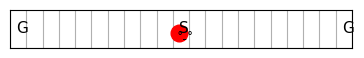

In [38]:
rw = randwalk_()
rw.render()

In [39]:
print(rw.rewards)
print(rw.rewards_set())

[0, -1, 1, 0]
[ 0  1 -1]


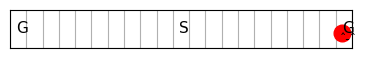

In [40]:
wander(rw)

In [41]:
gw8 = grid8()
gw8.s = 50
# wander(gw=gw8, pause=0)

Let us now visualise a random policy. This policy will not be useful of course for the agent to achieve its goal but it will show us how to move from a chaotic policy to an optimal one.

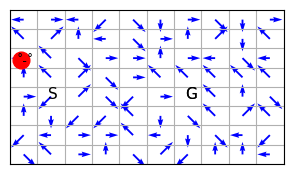

In [42]:
π=np.random.randint(gw8.nA, size=gw8.nS)
gw8.render(underhood='π', π=π)

## Cliff walking environment
In a cliff walking environment the agent needs to go purposely from a start position to a goal state. In between there is a cliff edge cells that if the agent steps into it fall off and reset into its start position.

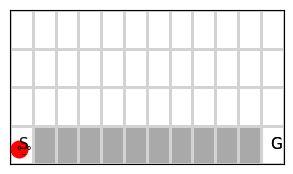

In [43]:
cw = cliffwalk()
cw.render()

In [44]:
# wander(cw, pause=0)

## Mazes with different sizes

In [45]:
def maze(rows=6, cols=9, **kw):
    return Grid(gridsize=[rows,cols], s0=int(rows//2)*cols, goals=[rows*cols-1], style='maze', **kw)

In [46]:
class mazes:
    def __init__(self, m=6, **kw):
        gridsizes = [(6, 9), (9 , 12), (12, 18), (16, 26), (24, 34), (32, 50), (39, 81), (60, 104)][:m]
        self.env = []
        for rows,cols in gridsizes:
            self.env.append(maze(rows,cols, **kw))
    
    def __getitem__(self, i): return self.env[i]
    
    def sizes(self):
        sizes = [0]
        for mz in  self.env: sizes.append(mz.nS_available())
        return sizes

print(mazes().sizes())

[0, 47, 92, 188, 372, 748, 1500]


In [47]:
12*.75

9.0

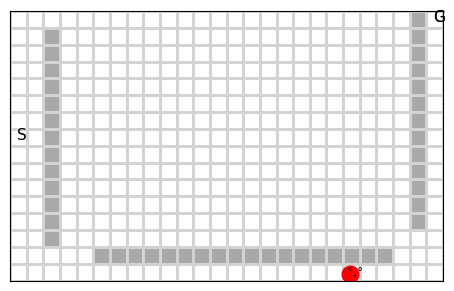

In [48]:
env=mazes(figsize=[19,3.5])[3]
env.s=20
env.render()

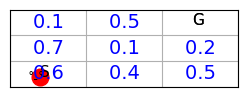

In [49]:
V0 = [.6, .4, .5, .7, .1, .2, .1, .5, 0]
env3x3 = Grid(gridsize=[3, 3], reward='reward_1', s0=0, goals=[8], figsize=[10,1])
env3x3.render(underhood='V', V=V0)

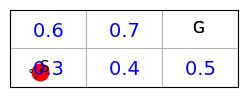

In [50]:
V0 = [.3, .4, .5, .6, .7, 0]
env2x3 = Grid(gridsize=[2, 3], s0=0, goals=[5], figsize=[10,1])
env2x3.render(underhood='V', V=V0)

## Grid class misuse

The Grid class is not perfect by any means, but we made enough effort to make it work for *our purposes* and it is not well-protected against hostile usage. For example, when we use the render with underhood ='letters' for a 2-d grid it will not make sense because it is intended for a 1-d random walk problem. See below

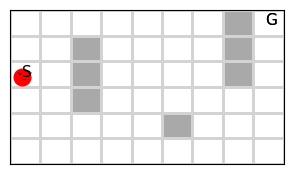

In [51]:
gw = Grid(style='maze')
gw.render(underhood='letters', pause=1)

Likewise, jumping is not protected against invalid moves.

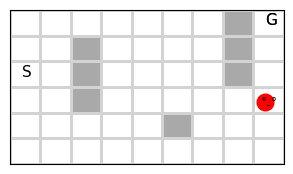

In [52]:
mz = maze()
mz.render()
plt.pause(3)
mz.jump = 3
mz.step(0)
mz.render()

## Conclusion
In this lesson, we covered a set of basic grid world environments that we will utilise in other lessons. You do not necessarily need to understand how the grid is programmatically built, but you need to understand how it operates.!

## Your turn
1. try to manually create a policy that will help the agent to reach its goal from any cell in the grid, use a simple 3x2 grid
2. try increase the grid size and see if you can come up with a policy function that will scale up consistently when we increase the grid size.

# Extra

## iGridi: A Grid with Images States
Below we use a different class from our Grid library called iGrid that will return after each step an observation which is the image of the grid instead of its state id. This is essential to be able to deal with a more general set of RL methods that are capable of learning by observing its environment instead of being given the state's id. Note that we save the images into a folder called img, so the code will create such a folder in the folder of this notebook.

In [53]:
from env.gridnn import *

In [54]:
def mazei(Grid=iGrid, r=6, c=9, **kw): # we cover this later
    return iGrid(gridsize=[r,c], s0=r//2*c, goals=[r*c-1], style='maze', **kw)#figsize is made ineffective


Let us create a play() function to demonstrate the Gridi.

In [55]:
def play(env, steps=5):
    
    img = [env.s_()]*steps                                             # initialise and declare
    # img = np.ones((steps,*env.s_().shape),dtype=int);img[0]=env.s_() # more efficent for large steps
    for i in range(steps):
        img[i], reward, done,_ = env.step(randint(3))
        env.render()                                                   # makes no effect since s_() calls render()
    return img

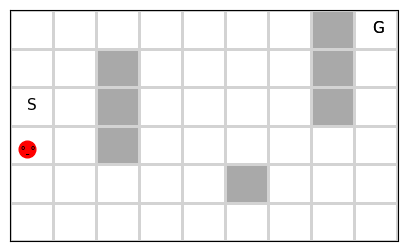

CPU times: user 1.33 s, sys: 384 ms, total: 1.72 s
Wall time: 652 ms


In [56]:
%time imgs0 = play(iGrid(animate=False, saveimg=True, resize=False, style='maze'))
# plt.close()
%time imgs1 = play(iGrid(animate=True, saveimg=True, resize=True, style='maze'))

In [57]:
imgs1[0].shape

(50, 84, 1)

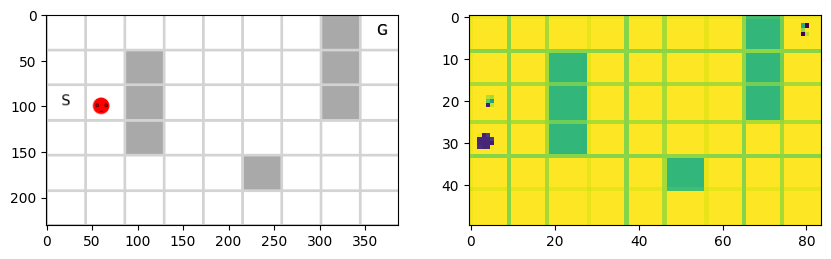

In [58]:
_, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(imgs0[4])
ax[1].imshow(imgs1[4].reshape(50,84))

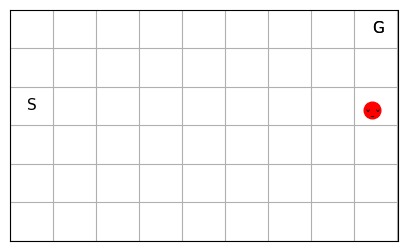

CPU times: user 19.5 s, sys: 5.42 s, total: 24.9 s
Wall time: 8.6 s


In [59]:
def test():
    gw=iGrid()#animate=False)
    for s in range(100): 
        gw.step(1)
        gw.render(image=True, animate=True)

%time test()

### Using s_() directly
We can use s_() function directly, in addition to step() function to obtain current image.

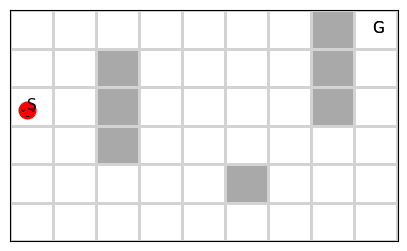

In [61]:
mz = iGrid(style='maze')
s = mz.s_()

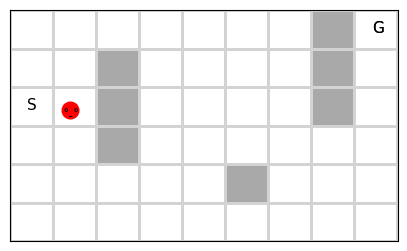

In [62]:
gw = iGrid(style='maze')
s = gw.step(1)

Note that using animate is slow because render() is being called twice unnecessarily.

(50, 84, 1)

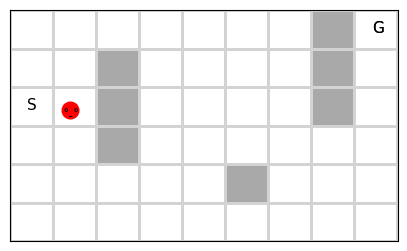

In [63]:
gw.s_().shape

Let us scan the grid and store the images on disk so that we can train a deep learning model later to extract useful features from the pixels automatically!

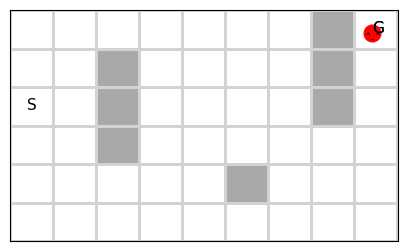

In [65]:
scan(iGrid(style='maze', saveimg=True))

## Testing Efficiency of Rendering
Let us now test the efficiency of the Grid class with respect to rendering. To do so we design a function to run some action and then render. 

In [68]:
def test_efficiency(test, n=100):
    gw=iGrid()
    gw.s=gw.s0 # reset the agent position
    # let us go right
    for s in range(n):
        gw.step(1)
        if test==0: gw.render(image=True,  animate=True)
        if test==1: gw.render(image=False, animate=True)
        if test==2: gw.render(image=True,  animate=False)
        if test==3: gw.render(image=False, animate=False)
    
    return gw

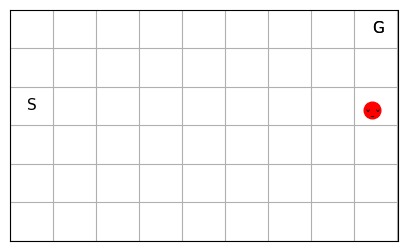

CPU times: user 19.5 s, sys: 5.39 s, total: 24.9 s
Wall time: 8.67 s


In [69]:
%time gw = test_efficiency(0)

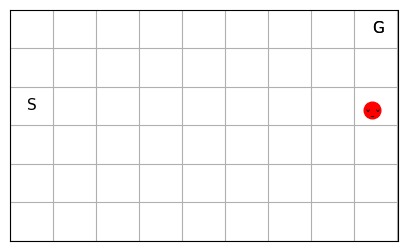

CPU times: user 19.5 s, sys: 5.44 s, total: 24.9 s
Wall time: 8.69 s
CPU times: user 4.58 s, sys: 133 ms, total: 4.71 s
Wall time: 4.55 s
CPU times: user 4.32 s, sys: 79.6 ms, total: 4.4 s
Wall time: 4.41 s


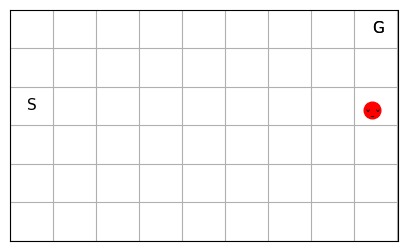

In [70]:
%time gw = test_efficiency(1)
%time gw = test_efficiency(2)
%time gw = test_efficiency(3)

Note how test3 is relatively efficient and taking little time although we are dealing images.

[Back to TOC](IntroductionTOC.ipynb)